<a href="https://colab.research.google.com/github/tienducvu03/Data-Science-Projects/blob/main/e_commerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load data

### Subtask:
Load the data from the "Brazil Ecommerce.xlsx" file into a pandas DataFrame.


**Reasoning**:
Import pandas and load the Excel file into a DataFrame, then display the first few rows.



In [ ]:
import pandas as pd

df = pd.read_excel('/content/Brazil Ecommerce.xlsx')
display(df.head())

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


## Explore data

### Subtask:
Perform exploratory data analysis to understand the data, identify potential issues, and gain insights. This may involve checking data types, missing values, distributions, and correlations.


**Reasoning**:
Perform exploratory data analysis by displaying data types, checking for missing values, displaying descriptive statistics, calculating correlation matrix, and displaying unique values for categorical columns.



In [ ]:
# Display data types
print("Data types:")
print(df.dtypes)

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Display descriptive statistics for numerical columns
print("\nDescriptive statistics:")
display(df.describe())

# Calculate and display the correlation matrix for numerical columns
print("\nCorrelation matrix:")
display(df.corr(numeric_only=True))

# Display unique values and their counts for categorical columns
print("\nUnique values and counts for categorical columns:")
for col in df.select_dtypes(include='object').columns:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())

Data types:
order_id                 object
payment_sequential        int64
payment_type             object
payment_installments      int64
payment_value           float64
dtype: object

Missing values:
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Descriptive statistics:


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000



Correlation matrix:


,payment_sequential,payment_installments,payment_value
payment_sequential,1.000000,-0.086363,-0.069593
payment_installments,-0.086363,1.000000,0.330811
payment_value,-0.069593,0.330811,1.000000



Unique values and counts for categorical columns:

Column: order_id
order_id
fa65dad1b0e818e3ccc5cb0e39231352    29
ccf804e764ed5650cd8759557269dc13    26
285c2e15bebd4ac83635ccc563dc71f4    22
895ab968e7bb0d5659d16cd74cd1650c    21
fedcd9f7ccdc8cba3a18defedd1a5547    19
                                    ..
646e62df54f3e236eb6d5ff3b31429b8     1
e115da7a49ec2acf622e1f31da65cfb9     1
f22592e01ddc0711e6794f900fa5e787     1
89a52f9735ee199f8c4583cd8d77de4c     1
5a8cbc60b032f344459aae65f0c01d26     1
Name: count, Length: 99440, dtype: int64

Column: payment_type
payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64


## Preprocess data

### Subtask:
Prepare the data for machine learning models. This could include handling missing values, encoding categorical variables, scaling numerical features, and splitting the data into training and testing sets.


**Reasoning**:
Drop the 'order_id' column, apply one-hot encoding to 'payment_type', separate features and target, and split the data into training and testing sets.



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Drop 'order_id'
df_processed = df.drop('order_id', axis=1)

# Identify categorical and numerical features
categorical_features = ['payment_type']
numerical_features = ['payment_sequential', 'payment_installments'] # Exclude payment_value as it's the target

# Separate target variable
X = df_processed.drop('payment_value', axis=1)
y = df_processed['payment_value']

# Create a column transformer for one-hot encoding and passing through numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)],
    remainder='passthrough') # Keep numerical columns

# Create a pipeline that first preprocesses the data
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Apply preprocessing to X
X_processed = pipeline.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (83108, 7)
Shape of X_test: (20778, 7)
Shape of y_train: (83108,)
Shape of y_test: (20778,)


## Select and train models

### Subtask:
Choose appropriate machine learning models for the task and train them on the training data.


**Reasoning**:
Import the necessary regression models and train them on the training data.



In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Instantiate models
lr_model = LinearRegression()
ridge_model = Ridge()
lasso_model = Lasso()
dt_model = DecisionTreeRegressor(random_state=42)
rf_model = RandomForestRegressor(random_state=42)
gbm_model = GradientBoostingRegressor(random_state=42)

# Train models
lr_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
gbm_model.fit(X_train, y_train)

print("Models trained successfully.")

Models trained successfully.


## Hyperparameter tuning

### Subtask:
Optimize the performance of the trained models by tuning their hyperparameters using techniques like cross-validation and grid search or random search.


**Reasoning**:
Choose Random Forest Regressor and Gradient Boosting Regressor for hyperparameter tuning as they are ensemble models which often benefit significantly from tuning. Define hyperparameter search spaces for both models and use RandomizedSearchCV to find the best hyperparameters and best estimator for each model.



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define parameter distributions for Random Forest Regressor
param_dist_rf = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Define parameter distributions for Gradient Boosting Regressor
param_dist_gbm = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
    'max_depth': [3, 4, 5, 6, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'max_features': ['auto', 'sqrt', 'log2', None]
}


# Instantiate RandomizedSearchCV for Random Forest Regressor
random_search_rf = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist_rf,
    n_iter=50, # Number of parameter settings that are sampled
    cv=5, # Number of cross-validation folds
    scoring='neg_mean_squared_error', # Evaluation metric
    random_state=42,
    n_jobs=-1 # Use all available cores
)

# Fit RandomizedSearchCV for Random Forest Regressor
random_search_rf.fit(X_train, y_train)

# Get the best Random Forest model and its parameters
best_rf_model = random_search_rf.best_estimator_
best_rf_params = random_search_rf.best_params_

print("Best parameters for Random Forest:", best_rf_params)


# Instantiate RandomizedSearchCV for Gradient Boosting Regressor
random_search_gbm = RandomizedSearchCV(
    estimator=gbm_model,
    param_distributions=param_dist_gbm,
    n_iter=50, # Number of parameter settings that are sampled
    cv=5, # Number of cross-validation folds
    scoring='neg_mean_squared_error', # Evaluation metric
    random_state=42,
    n_jobs=-1 # Use all available cores
)

# Fit RandomizedSearchCV for Gradient Boosting Regressor
random_search_gbm.fit(X_train, y_train)

# Get the best Gradient Boosting model and its parameters
best_gbm_model = random_search_gbm.best_estimator_
best_gbm_params = random_search_gbm.best_params_

print("Best parameters for Gradient Boosting:", best_gbm_params)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
115 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
64 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils

Best parameters for Random Forest: {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None, 'bootstrap': False}


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
70 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/

Best parameters for Gradient Boosting: {'subsample': 1.0, 'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 3, 'learning_rate': 0.15}


## Evaluate models

### Subtask:
Evaluate the performance of the tuned models using appropriate metrics on the testing data.


**Reasoning**:
Evaluate the performance of the tuned models using appropriate metrics on the testing data.



In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Make predictions on the test set
y_pred_rf = best_rf_model.predict(X_test)
y_pred_gbm = best_gbm_model.predict(X_test)

# Calculate metrics for Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Calculate metrics for Gradient Boosting
mse_gbm = mean_squared_error(y_test, y_pred_gbm)
rmse_gbm = np.sqrt(mse_gbm)
r2_gbm = r2_score(y_test, y_pred_gbm)

# Print the metrics
print("Random Forest Model Evaluation:")
print(f"  MSE: {mse_rf:.2f}")
print(f"  RMSE: {rmse_rf:.2f}")
print(f"  R-squared: {r2_rf:.2f}")

print("\nGradient Boosting Model Evaluation:")
print(f"  MSE: {mse_gbm:.2f}")
print(f"  RMSE: {rmse_gbm:.2f}")
print(f"  R-squared: {r2_gbm:.2f}")

Random Forest Model Evaluation:
  MSE: 36378.17
  RMSE: 190.73
  R-squared: 0.14

Gradient Boosting Model Evaluation:
  MSE: 36377.59
  RMSE: 190.73
  R-squared: 0.14


## Visualize results

### Subtask:
Visualize the results of the model evaluation and comparison to present the findings effectively.


**Reasoning**:
Create a bar plot to compare the MSE and R-squared values for the Random Forest and Gradient Boosting models.



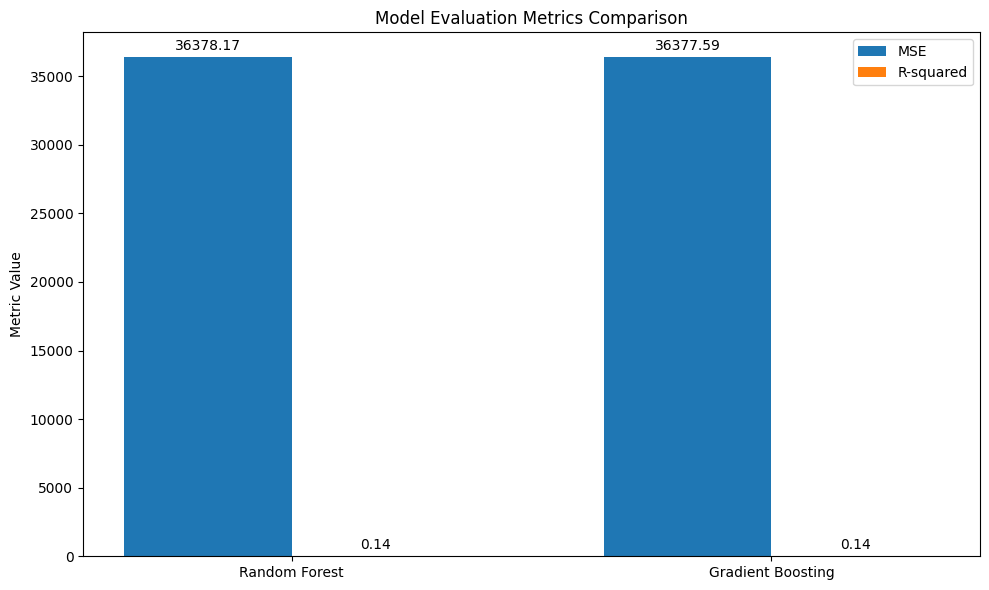

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics for plotting
models = ['Random Forest', 'Gradient Boosting']
mse_values = [mse_rf, mse_gbm]
r2_values = [r2_rf, r2_gbm]

x = np.arange(len(models)) # the label locations
width = 0.35 # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, mse_values, width, label='MSE')
rects2 = ax.bar(x + width/2, r2_values, width, label='R-squared')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Metric Value')
ax.set_title('Model Evaluation Metrics Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Add labels to the bars
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('%.2f' % height,
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   The dataset contains 103,886 rows and 5 columns: 'order\_id', 'payment\_sequential', 'payment\_type', 'payment\_installments', and 'payment\_value'.
*   There are no missing values in the dataset.
*   The `payment_value` ranges from 0 to 13664.08 with a mean of 154.10, indicating a skewed distribution.
*   'credit\_card' is the most frequent `payment_type`.
*   After preprocessing, which included dropping 'order\_id', one-hot encoding 'payment\_type', and splitting the data, the training set has 83108 samples and 7 features, and the testing set has 20778 samples and 7 features.
*   Hyperparameter tuning using RandomizedSearchCV for Random Forest and Gradient Boosting models resulted in the following best parameters:
    *   Random Forest: `{'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None, 'bootstrap': False}`
    *   Gradient Boosting: `{'subsample': 1.0, 'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 3, 'learning_rate': 0.15}`
*   Both the tuned Random Forest and Gradient Boosting models show similar performance on the test set:
    *   Random Forest: MSE: 36378.17, RMSE: 190.73, R-squared: 0.14
    *   Gradient Boosting: MSE: 36377.59, RMSE: 190.73, R-squared: 0.14
*   The R-squared values of 0.14 indicate that the models explain only 14\% of the variance in the `payment_value`.

### Insights or Next Steps

*   The low R-squared value suggests that the current features ('payment\_sequential', 'payment\_installments', and one-hot encoded 'payment\_type') are not strong predictors of `payment_value`. Future steps should involve feature engineering using additional relevant data (if available) or exploring other modeling techniques.
*   Investigate the instances with high `payment_value` and low `payment_installments` to understand the distribution better and potentially identify outliers or data entry issues.
